[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-autonoma-python/blob/main/3-Intro-Vision/3-3-Filtros-Espaciales.ipynb)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

Si se usa colab se puede utilizar las imágenes del repositorio, de lo contrario se pueden cargar manualmente.

In [2]:
colab = True
if (colab):
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/edificio.jpg
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/edificio2.jpg
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/monedas.jpg

# 1.&nbsp;Filtros espaciales

In [3]:
# Imagen inicial
I = cv2.imread('edificio.jpg')

## 1.1. Suavizado

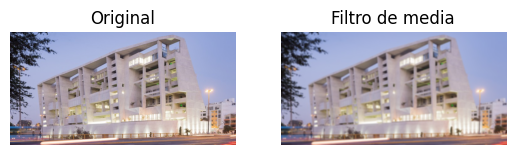

In [4]:
# Especificación manual de un filtro (kernel)
kernel = np.ones((5,5), np.float32)/25.0
Imedia = cv2.filter2D(I, -1, kernel)

# plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('Original'); plt.axis('off')
plt.subplot(122); plt.imshow(cv2.cvtColor(Imedia, cv2.COLOR_BGR2RGB))
plt.title('Filtro de media'); plt.axis('off')
plt.show()

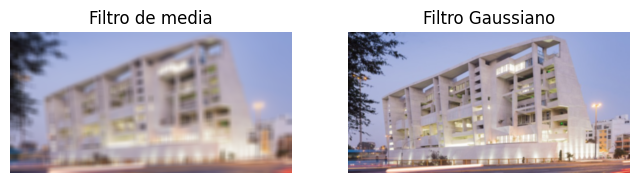

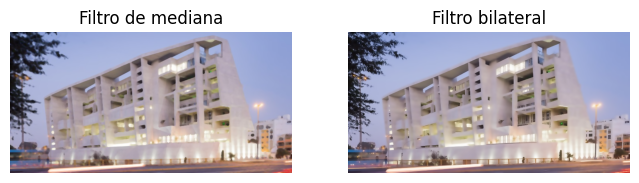

In [8]:
# Uso de funciones que implementan filtros
I_media = cv2.blur(I, (15,15))               # Filtro de media
I_gauss = cv2.GaussianBlur(I, (5,5), 0)      # Filtro Gaussiano
I_mediana = cv2.medianBlur(I, 5)             # Filtro de mediana
I_bilat = cv2.bilateralFilter(I, 9, 75, 75)  # Filtro bilateral

plt.figure(figsize=(8,4))
plt.subplot(121); plt.imshow(cv2.cvtColor(I_media, cv2.COLOR_BGR2RGB))
plt.title('Filtro de media'); plt.axis('off')
plt.subplot(122); plt.imshow(cv2.cvtColor(I_gauss, cv2.COLOR_BGR2RGB))
plt.title('Filtro Gaussiano'); plt.axis('off')

plt.figure(figsize=(8,4))
plt.subplot(121); plt.imshow(cv2.cvtColor(I_mediana, cv2.COLOR_BGR2RGB))
plt.title('Filtro de mediana'); plt.axis('off')
plt.subplot(122); plt.imshow(cv2.cvtColor(I_bilat, cv2.COLOR_BGR2RGB))
plt.title('Filtro bilateral'); plt.axis('off')
plt.show()

## 1.2. Gradientes

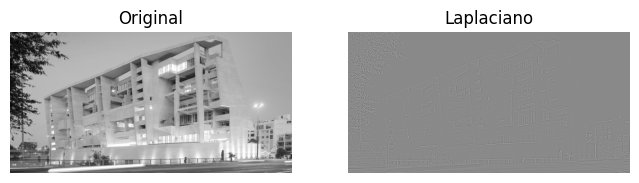

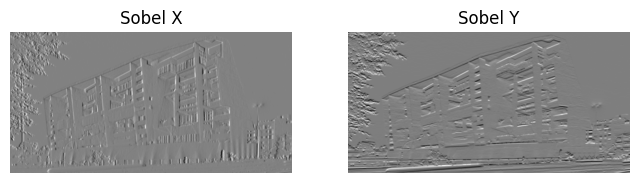

In [10]:
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

I_laplacian = cv2.Laplacian(Igray, cv2.CV_64F)
I_sobelx = cv2.Sobel(Igray, cv2.CV_64F, 1, 0, ksize=5)
I_sobely = cv2.Sobel(Igray, cv2.CV_64F, 0, 1, ksize=5)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(Igray,cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(I_laplacian,cmap='gray'); plt.title('Laplaciano'); plt.axis('off')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(I_sobelx,cmap='gray'); plt.title('Sobel X'); plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(I_sobely,cmap='gray'); plt.title('Sobel Y'); plt.axis('off')
plt.show()

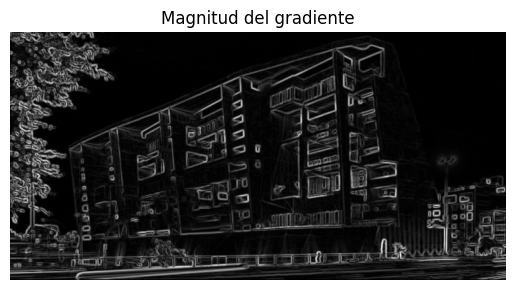

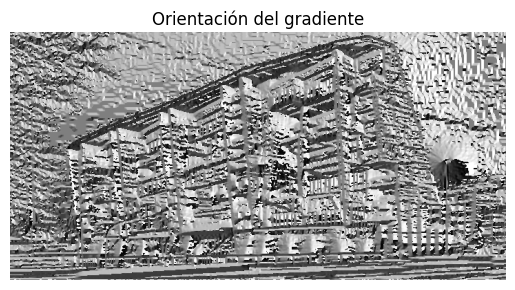

In [11]:
# Magnitud del gradiente
Igrad_mag = np.sqrt(I_sobelx**2+I_sobely**2)

# Orientación del gradiente
Igrad_or  = np.arctan2(I_sobely,I_sobelx)

# Mostrar
plt.imshow(Igrad_mag,cmap='gray'); plt.title('Magnitud del gradiente')
plt.axis('off'); plt.show()
plt.imshow(Igrad_or,cmap='gray'); plt.title('Orientación del gradiente')
plt.axis('off'); plt.show()

# 2.&nbsp;Detector de bordes de Canny

In [12]:
# Lectura de la imagen original
I = cv2.imread('edificio2.jpg')

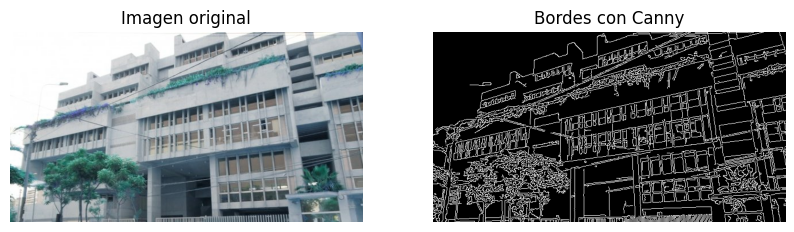

In [13]:
T_low = 50      # Umbral bajo
T_high = 150    # Umbral alto
ksize = (5,5)   # Tamaño de Kernel (sobel) para gradientes (por defecto 3)
Icanny = cv2.Canny(I, T_low, T_high, ksize)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(I, cmap='gray'); plt.title('Imagen original'); plt.axis('off')
plt.subplot(122)
plt.imshow(Icanny, cmap='gray'); plt.title('Bordes con Canny'); plt.axis('off')
plt.show()

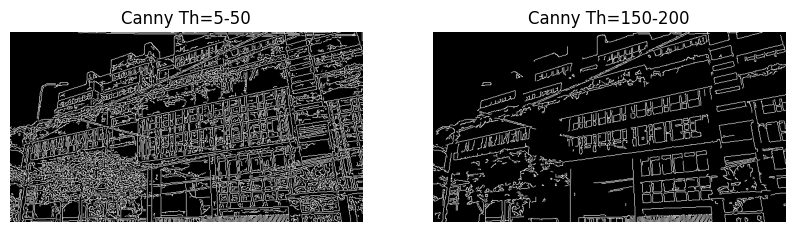

In [14]:
# Ejemplos con otros umbrales
Icanny2 = cv2.Canny(I, 5, 50)
Icanny3 = cv2.Canny(I, 150, 250)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(Icanny2,cmap='gray'); plt.title('Canny Th=5-50'); plt.axis('off')
plt.subplot(122)
plt.imshow(Icanny3,cmap='gray'); plt.title('Canny Th=150-200'); plt.axis('off')
plt.show()

# 3.&nbsp;Transformada de Hough

## 3.1. Hough para Líneas

In [15]:
# Bordes de la imagen en escala de grises
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
Iedges = cv2.Canny(Igray, 50, 150, apertureSize=3)

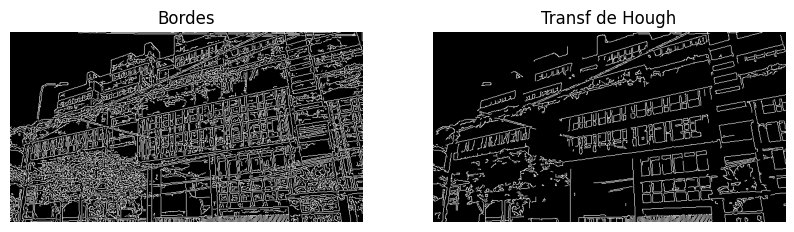

In [16]:
# Parámetros de Hough
votos = 210
lineas = cv2.HoughLines(Iedges, 1, 1*np.pi/180, votos)

# Imagen donde se dibujará las líneas
Ihough = I.copy()
for linea in lineas:
    for rho,theta in linea:
        a = np.cos(theta); b = np.sin(theta)
        x0 = a*rho; y0 = b*rho
        x1 = int(x0 + 1000*(-b)); y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b)); y2 = int(y0 - 1000*(a))
        cv2.line(Ihough, (x1,y1), (x2,y2), (0,0,255), 2)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(Icanny2, cmap='gray'); plt.title('Bordes'); plt.axis('off')
plt.subplot(122)
plt.imshow(Icanny3, cmap='gray'); plt.title('Transf de Hough'); plt.axis('off')
plt.show()

## 3.2. Hough probabilístico para líneas

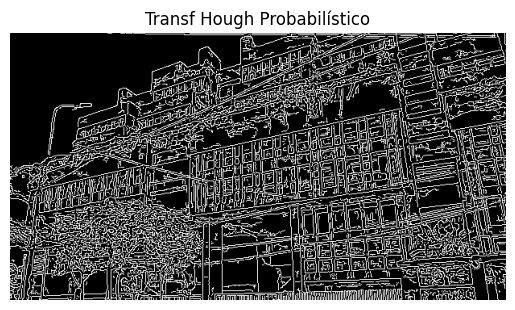

In [17]:
# Parámetros de hough probabilístico
minLineLength = 100
maxLineGap = 10
thvotes = 180
lines = cv2.HoughLinesP(Iedges, 1, np.pi/180, thvotes, minLineLength, maxLineGap)

# Imagen donde se dibujará las líneas
Ihoughp = I.copy()
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(Ihoughp, (x1,y1), (x2,y2), (0,255,0), 2)

plt.imshow(Icanny2, cmap='gray')
plt.title('Transf Hough Probabilístico')
plt.axis('off'); plt.show()

## 3.3. Hough para cìrculos

In [18]:
I2 = cv2.imread('monedas.jpg',0)
Imedian = cv2.medianBlur(I2, 5)

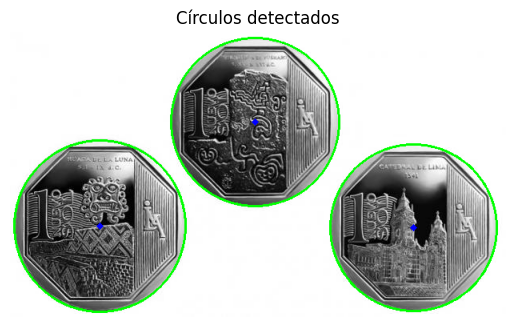

In [19]:
# Hough
circles = cv2.HoughCircles(Imedian, cv2.HOUGH_GRADIENT, 1, 30, param1=150,
                           param2=100, minRadius=10, maxRadius=200)
circles = np.uint16(np.around(circles))

# Imagen donde se dibujará los círculos
Ihough = cv2.cvtColor(I2, cv2.COLOR_GRAY2BGR)
for c in circles[0,:]:
    # Círculo externo
    cv2.circle(Ihough, (c[0],c[1]), c[2], (0,255,0), 2)
    # Centro del círculo
    cv2.circle(Ihough, (c[0], c[1]), 2, (0,0,255), 3)

plt.imshow(Ihough, cmap='gray')
plt.title('Círculos detectados')
plt.axis('off'); plt.show()